In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# > Kaggle: https://www.kaggle.com/competitions/digit-recognizer

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv').astype('float64')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv').astype('float64')
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')


In [66]:
print(f'shape of the data set is: {df_train.shape}')
print(f"nan valuus: {df_train.isna().sum().sum()}")

shape of the data set is: (42000, 785)
nan valuus: 0


In [67]:

def pre_process(data):
    data = np.reshape(data, (data.shape[0],28,28,1))
    data = data / 255
    return data



In [68]:
X_train = df_train.drop(['label'], axis = 1)
X_test = df_test
y_train = df_train['label']

X_train, X_test = pre_process(X_train.values), pre_process(X_test.values)

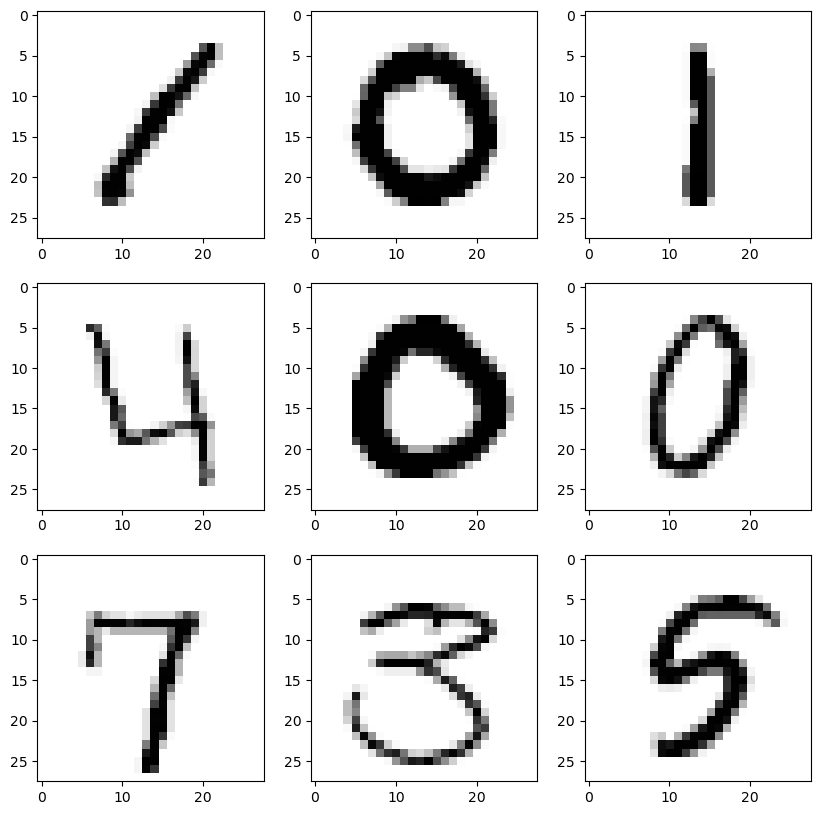

In [69]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(np.reshape(X_train[i], (28,28)), cmap="Greys")
plt.show()

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [116]:
    

def build_model(input_shape, decay_rate, drop_rate):
    initializer = tf.keras.initializers.he_uniform()

    model= Sequential([
    Conv2D(8, (3, 3), padding = 'same', activation = 'relu', input_shape = input_shape),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(3, (3, 3), padding = 'same', activation = 'relu', input_shape = input_shape),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dropout(drop_rate),
    Dense(64, activation = 'relu'),
    Dropout(drop_rate),
    Dense(10, activation = 'softmax')
    ])
    return model

model = build_model(X_train[0].shape, 0.01, 0.2)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 8)         584       
                                                                 
 flatten_12 (Flatten)        (None, 1568)              0         
                                                                 
 dense_38 (Dense)            (None, 128)               200832    
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                     

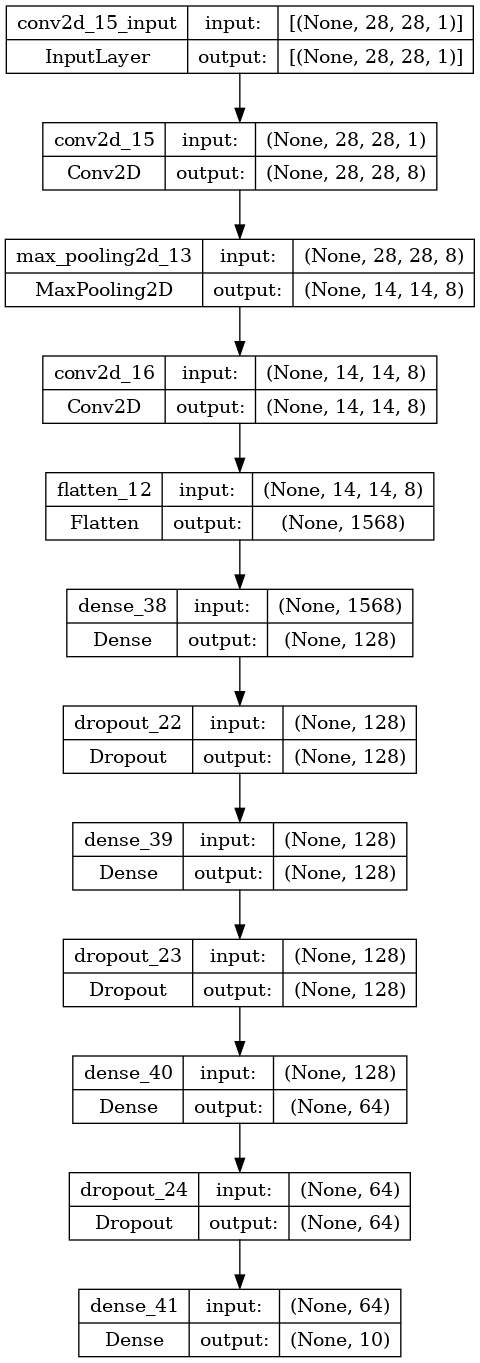

In [117]:
plot_model(model, to_file='model.png', show_shapes=True)

In [118]:
def compile_model(model):
    opt = Adam(learning_rate = 0.001)
    model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [119]:
y_train=y_train.astype('int64')

In [112]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [120]:
early_stopping = EarlyStopping(mode = 'min', patience = 5, monitor='val_loss')
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 5)


In [121]:
compile_model(model)
historty = model.fit(X_train, y_train.values, epochs = 20, batch_size = 16,
                     validation_split = 0.15, verbose = 1, callbacks=[early_stopping, learning_rate_reduction])

Epoch 1/20
2232/2232 [==============================] - 24s 10ms/step - loss: 0.3019 - accuracy: 0.9099 - val_loss: 0.0983 - val_accuracy: 0.9694 - lr: 0.0010
Epoch 2/20
2232/2232 [==============================] - 23s 10ms/step - loss: 0.1075 - accuracy: 0.9695 - val_loss: 0.0793 - val_accuracy: 0.9767 - lr: 0.0010
Epoch 3/20
2232/2232 [==============================] - 23s 10ms/step - loss: 0.0771 - accuracy: 0.9781 - val_loss: 0.0756 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 4/20
2232/2232 [==============================] - 23s 10ms/step - loss: 0.0594 - accuracy: 0.9832 - val_loss: 0.0601 - val_accuracy: 0.9824 - lr: 0.0010
Epoch 5/20
2232/2232 [==============================] - 23s 10ms/step - loss: 0.0476 - accuracy: 0.9863 - val_loss: 0.0531 - val_accuracy: 0.9854 - lr: 0.0010
Epoch 6/20
2232/2232 [==============================] - 22s 10ms/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.0588 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 7/20
2232/2232 [========================

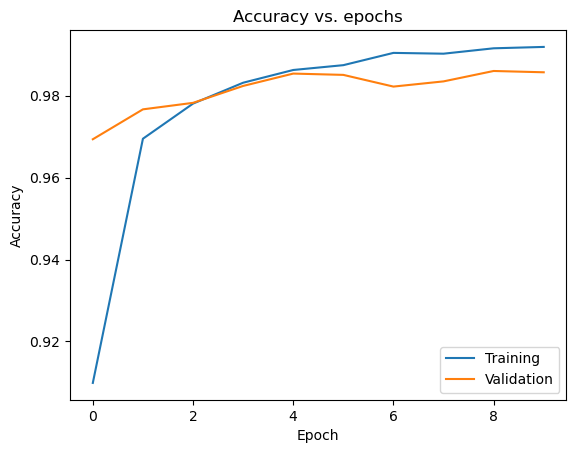

In [122]:
try:
    plt.plot(historty.history['accuracy'])
    plt.plot(historty.history['val_accuracy'])
except KeyError:
    plt.plot(historty.history['acc'])
    plt.plot(historty.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [123]:
y_test = model.predict(X_test)

875/875 [==============================] - 5s 5ms/step


In [125]:
y_pred =  np.argmax(y_test, axis=1)

In [126]:
sub['Label'] = y_pred

In [130]:
sub.drop(['label'], axis =1, inplace =True)

In [127]:
sub[:30]

,ImageId,label,Label
0,1,2,2
1,2,0,0
2,3,9,9
3,4,9,9
4,5,3,3
5,6,9,7
6,7,0,0
7,8,3,3
8,9,0,0
9,10,3,3


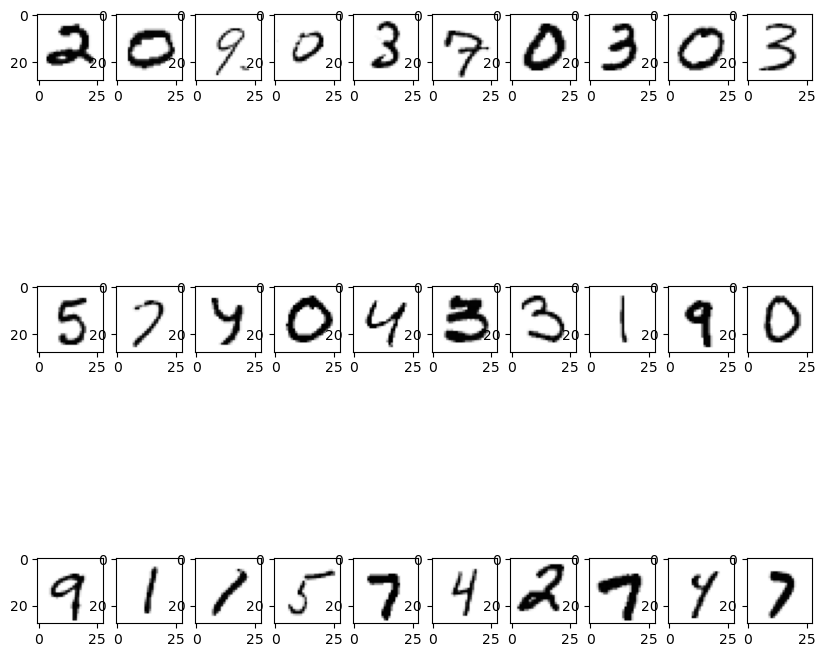

In [100]:
fig, ax = plt.subplots(3,10, figsize = (10,10))
axes = ax.flatten()
for i in range(30):
    
    axes[i].imshow(np.reshape(X_test[i], (28,28)), cmap="Greys")
plt.show()

In [131]:
sub.to_csv('sub.csv', index = False)